In [12]:
import gradio as gr
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image


# Load the pre-trained model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image):
    # Process the image and generate a caption
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# Create Gradio interface
imgClass = gr.Interface(
    fn=generate_caption,
    inputs=gr.Image(type="pil"),  # Updated input method
    outputs="text",
    title=" Image Captioning Check w/ Coco",
    description="Upload an image to generate text description."
)

# Launch the interface
imgClass.launch(share= True)


* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://6df88c76155d77d4c5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [33]:
import gradio as gr
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load the pre-trained model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image, max_length=50):
    try:
        # Process the image and generate a caption
        inputs = processor(images=image, return_tensors="pt")
        out = model.generate(**inputs, max_length=max_length)
        caption = processor.decode(out[0], skip_special_tokens=True)
        return caption
    except Exception as e:
        return f"Error generating caption: {e}"

# Create Gradio interface
imgClass = gr.Interface(
    fn=generate_caption,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),  # Updated input method with label
        gr.Slider(minimum=5, maximum=100, step=5, value=50, label="Max Caption Length")  # Set default value with 'value'
    ],
    outputs="text",
    title="Image Captioning with BLIP",
    description="Upload an image to generate a text. Adjust the maximum caption length if desired."
)

# Launch the interface
imgClass.launch(share=True)


OMP: Warning #191: Forking a process while a parallel region is active is potentially unsafe.


* Running on local URL:  http://127.0.0.1:7869


OMP: Warning #191: Forking a process while a parallel region is active is potentially unsafe.


* Running on public URL: https://52927dcfcbf940299c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [38]:
# Load dependencies to measure text output
import nltk
from rouge_score import rouge_scorer

In [42]:
# Prompted captions and generated captions
reference_captions = ['Chicago in the summer', "Fat Cat"]
generated_captions = ['A city in the summer', "Large Cat"]

# BLEU Score
from nltk.translate.bleu_score import sentence_bleu

# Calculate BLEU scores for each pair of reference and generated captions
bleu_scores = [sentence_bleu([ref.split()], gen.split()) for ref, gen in zip(reference_captions, generated_captions)]

# Calculate the average BLEU score
average_bleu = sum(bleu_scores) / len(bleu_scores)

# Print the average BLEU score
print(f"Average BLEU Score: {average_bleu:.4f}")

Average BLEU Score: 0.0000


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider usi

In [43]:
# ROUGE Score to break down human prompt and generated 
# rouge1 = measures signle word , rouge2 = measure consecutive words in pairs, rougeL= looks at the whole sentence and scores based on sequence
def calculate_rouge(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

for ref, gen in zip(reference_captions, generated_captions):
    rouge_score = calculate_rouge(ref, gen)
    print(f"ROUGE scores for reference: '{ref}' and generated: '{gen}': {rouge_score}")

ROUGE scores for reference: 'Chicago in the summer' and generated: 'A city in the summer': {'rouge1': Score(precision=0.6, recall=0.75, fmeasure=0.6666666666666665), 'rouge2': Score(precision=0.5, recall=0.6666666666666666, fmeasure=0.5714285714285715), 'rougeL': Score(precision=0.6, recall=0.75, fmeasure=0.6666666666666665)}
ROUGE scores for reference: 'Fat Cat' and generated: 'Large Cat': {'rouge1': Score(precision=0.5, recall=0.5, fmeasure=0.5), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.5, recall=0.5, fmeasure=0.5)}


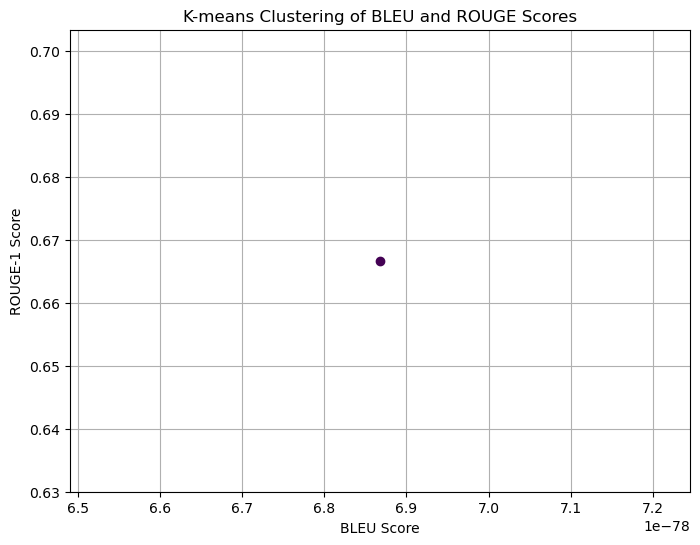

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from sklearn.cluster import KMeans


# Sample reference and generated captions
reference_captions = ['Chicago in the summer']
generated_captions = ['A city in the summer']

# Calculate BLEU scores
bleu_scores = [sentence_bleu([ref.split()], gen.split()) for ref, gen in zip(reference_captions, generated_captions)]

# Calculate ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = [scorer.score(ref, gen) for ref, gen in zip(reference_captions, generated_captions)]
rouge1_scores = [score['rouge1'].fmeasure for score in rouge_scores]
rouge2_scores = [score['rouge2'].fmeasure for score in rouge_scores]
rougeL_scores = [score['rougeL'].fmeasure for score in rouge_scores]

# Prepare data for K-means
X = np.array(list(zip(bleu_scores, rouge1_scores)))

# Apply K-means clustering
kmeans = KMeans(n_clusters=1)  # Choose number of clusters
kmeans.fit(X)
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering of BLEU and ROUGE Scores')
plt.xlabel('BLEU Score')
plt.ylabel('ROUGE-1 Score')
plt.grid(True)
plt.show()
